In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import random
import os
import numpy as np
import matplotlib.pyplot as plt


In [7]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of Y_train: {Y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of Y_test: {Y_test.shape}")

Shape of X_train: (60000, 28, 28)
Shape of Y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of Y_test: (10000,)


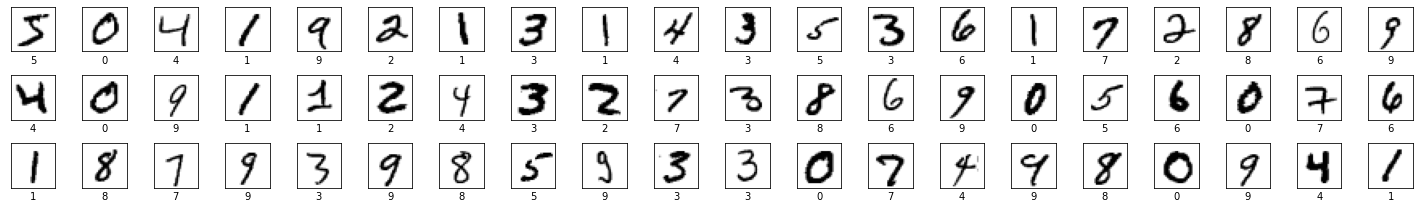

In [8]:
ROWS = 3
COLS = 20
i = 0
plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(X_train[i], cmap=plt.cm.gray_r)
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(Y_train[i])
        i += 1
plt.tight_layout()
plt.show()

In [9]:

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train, X_test = X_train / 255.0, X_test / 255.0

In [10]:

model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [11]:
model.compile(
   optimizer='SGD', 
   loss='sparse_categorical_crossentropy', 
   metrics=['accuracy']
 )

In [12]:
h = model.fit(x=X_train, y=Y_train, epochs=4, validation_split=0.2, batch_size=32)

Epoch 1/4
1500/1500 [==============================] - 15s 10ms/step - loss: 1.0704 - accuracy: 0.6768 - val_loss: 0.2735 - val_accuracy: 0.9145
Epoch 2/4
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2157 - accuracy: 0.9339 - val_loss: 0.1834 - val_accuracy: 0.9430
Epoch 3/4
1500/1500 [==============================] - 15s 10ms/step - loss: 0.1468 - accuracy: 0.9543 - val_loss: 0.1230 - val_accuracy: 0.9622
Epoch 4/4
1500/1500 [==============================] - 15s 10ms/step - loss: 0.1158 - accuracy: 0.9642 - val_loss: 0.1020 - val_accuracy: 0.9705


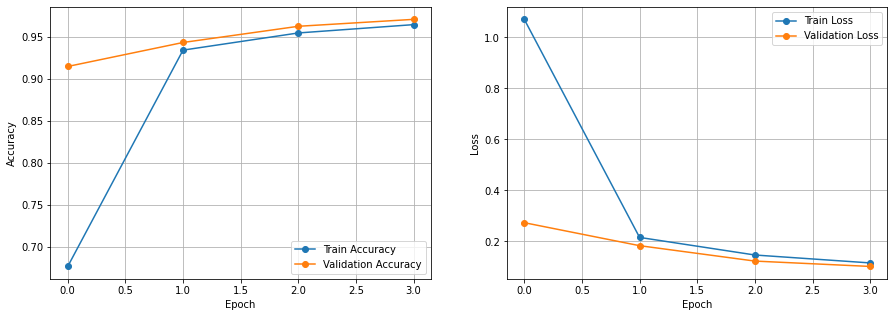

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(h.history['accuracy'], 'o-', label='Train Accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.subplot(1, 2, 2)
plt.plot(h.history['loss'], 'o-', label='Train Loss')
plt.plot(h.history['val_loss'], 'o-', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

In [16]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 4ms/step - loss: 0.0946 - accuracy: 0.9725

Test Accuracy: 0.9725000262260437

Test Loss: 0.09463442116975784


In [21]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)               

In [22]:
model.compile(
    optimizer='SGD', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [23]:
h2 = model.fit(x=X_train, y=Y_train, epochs=5, batch_size=28, validation_split=0.2)

Epoch 1/5
1715/1715 [==============================] - 16s 9ms/step - loss: 0.9111 - accuracy: 0.7103 - val_loss: 0.2181 - val_accuracy: 0.9330
Epoch 2/5
1715/1715 [==============================] - 16s 9ms/step - loss: 0.1727 - accuracy: 0.9474 - val_loss: 0.1343 - val_accuracy: 0.9596
Epoch 3/5
1715/1715 [==============================] - 16s 10ms/step - loss: 0.1173 - accuracy: 0.9639 - val_loss: 0.0977 - val_accuracy: 0.9706
Epoch 4/5
1715/1715 [==============================] - 16s 9ms/step - loss: 0.0923 - accuracy: 0.9720 - val_loss: 0.0794 - val_accuracy: 0.9762
Epoch 5/5
1715/1715 [==============================] - 16s 9ms/step - loss: 0.0774 - accuracy: 0.9762 - val_loss: 0.0778 - val_accuracy: 0.9778


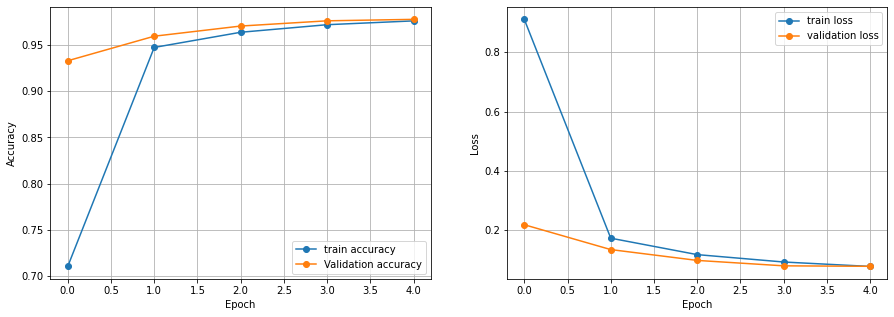

In [28]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h2.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h2.history['val_accuracy'], 'o-', label = 'Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h2.history['loss'], 'o-', label='train loss')
plt.plot(h2.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [29]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Loss:', test_loss)
print('\nTest Accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0683 - accuracy: 0.9779

Test Loss: 0.06830594688653946

Test Accuracy: 0.9779000282287598


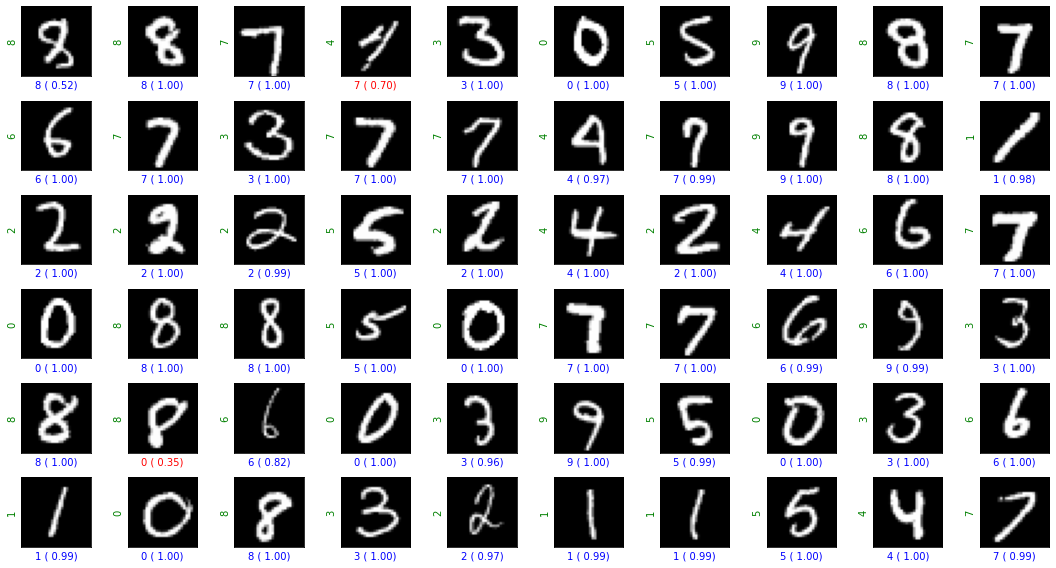

In [30]:
ROWS = 6
COLS = 10

random_indices = random.sample(range(X_test.shape[0]), ROWS*COLS)
sample_images = X_test[random_indices, :]
sample_labels = Y_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(15,8))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

In [37]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 64)               

In [32]:
model.compile(
    optimizer='RMSProp', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [33]:
h3 = model.fit(x=X_train, y=Y_train, epochs=5, batch_size=28, validation_split=0.2)

Epoch 1/5
1715/1715 [==============================] - 17s 10ms/step - loss: 0.2154 - accuracy: 0.9323 - val_loss: 0.0774 - val_accuracy: 0.9762
Epoch 2/5
1715/1715 [==============================] - 16s 10ms/step - loss: 0.0659 - accuracy: 0.9803 - val_loss: 0.0695 - val_accuracy: 0.9808
Epoch 3/5
1715/1715 [==============================] - 17s 10ms/step - loss: 0.0474 - accuracy: 0.9860 - val_loss: 0.0457 - val_accuracy: 0.9875
Epoch 4/5
1715/1715 [==============================] - 16s 10ms/step - loss: 0.0364 - accuracy: 0.9894 - val_loss: 0.0433 - val_accuracy: 0.9875
Epoch 5/5
1715/1715 [==============================] - 16s 10ms/step - loss: 0.0308 - accuracy: 0.9910 - val_loss: 0.0463 - val_accuracy: 0.9883


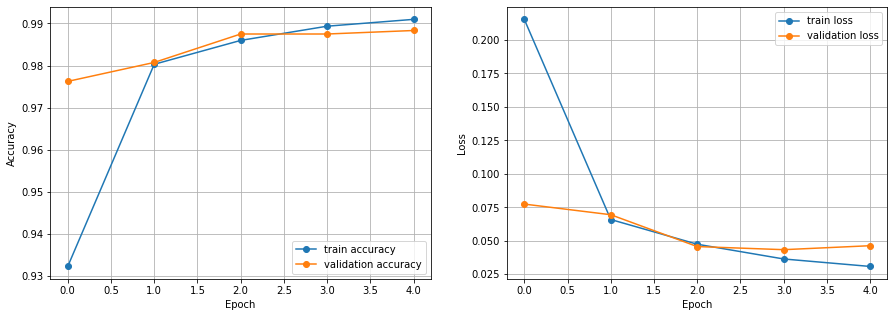

In [34]:

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h3.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h3.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h3.history['loss'], 'o-', label='train loss')
plt.plot(h3.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [35]:

test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Loss:', test_loss)
print('\nTest Accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0417 - accuracy: 0.9890

Test Loss: 0.04172733053565025

Test Accuracy: 0.9890000224113464


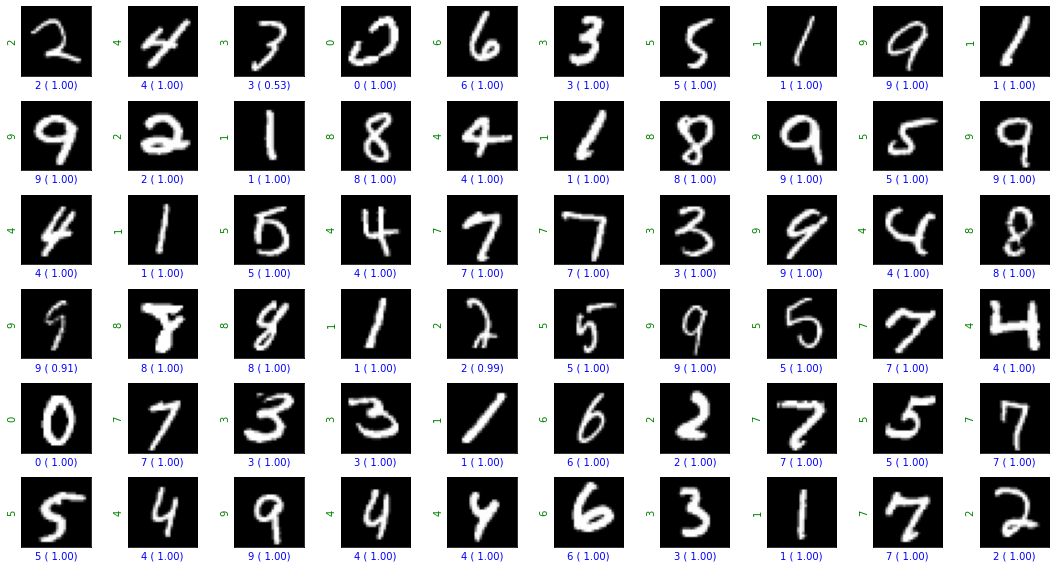

In [36]:
ROWS = 6
COLS = 10

random_indices = random.sample(range(X_test.shape[0]), ROWS*COLS)
sample_images = X_test[random_indices, :]
sample_labels = Y_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(15,8))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()